In [1]:
import numpy as np
import pandas as pd
import os
import json
import glob
import matplotlib.pyplot as plt

In [2]:
prof_path = "../code/results_profiling/"

In [3]:
runs = []
for run in os.listdir(prof_path):
    if not os.path.isdir(os.path.join(prof_path, run)):
        continue
    with open(os.path.join(prof_path, run, "config.json")) as f:
        config = json.load(f)
    runs.append((config, pd.read_csv(os.path.join(prof_path, run, "profiling.csv"))))

In [4]:
by_train_size = {k['train_size']: v for k, v in runs if k['batch_size'] == 256}

In [5]:
for (train_size, df) in by_train_size.items():
    df['train_size'] = train_size

In [6]:
all_data = pd.concat(by_train_size.values(), axis=0)

In [7]:
all_data.replace(-1.0, np.nan, inplace=True)

In [8]:
all_data[(all_data.dataset == 'fashionmnist') & (all_data.algorithm == 'isomap')]

dataset algorithm        time  train_size
10  fashionmnist    isomap  161.284940       70000
10  fashionmnist    isomap         NaN      100000
10  fashionmnist    isomap    9.244687        5000
10  fashionmnist    isomap   41.953510       10000
10  fashionmnist    isomap    0.319166        1000
10  fashionmnist    isomap         NaN       30000

<Axes: xlabel='train_size'>

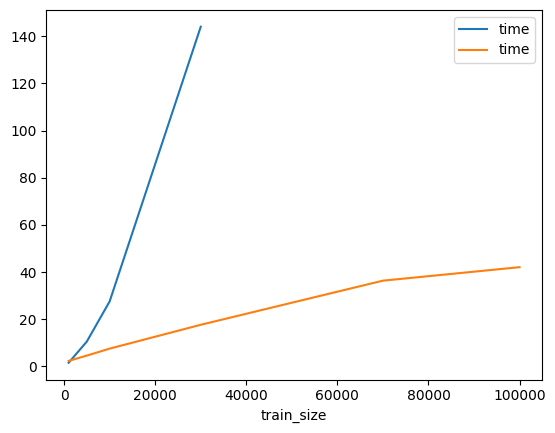

In [9]:
g = all_data.groupby(['dataset', 'algorithm'])
ax = g.get_group(('mnist', 'tsne')).sort_values(by='train_size').plot('train_size', 'time')
g.get_group(('mnist', 'sharp')).sort_values(by='train_size').plot('train_size', 'time', ax=ax)

[<Axes: title={'center': "('fashionmnist',)"}, xlabel='train_size'>,
 <Axes: title={'center': "('har',)"}, xlabel='train_size'>,
 <Axes: title={'center': "('mnist',)"}, xlabel='train_size'>,
 <Axes: title={'center': "('reuters',)"}, xlabel='train_size'>,
 <Axes: title={'center': "('usps',)"}, xlabel='train_size'>]

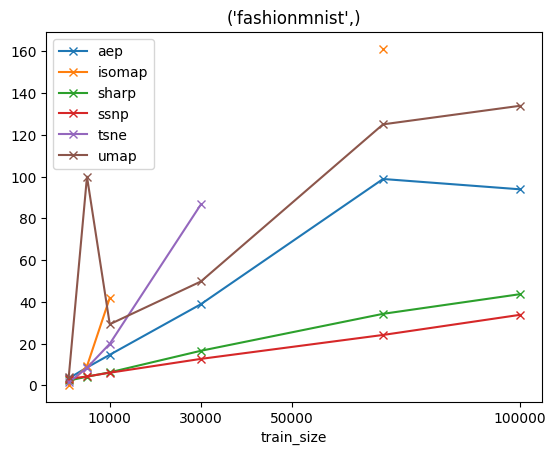

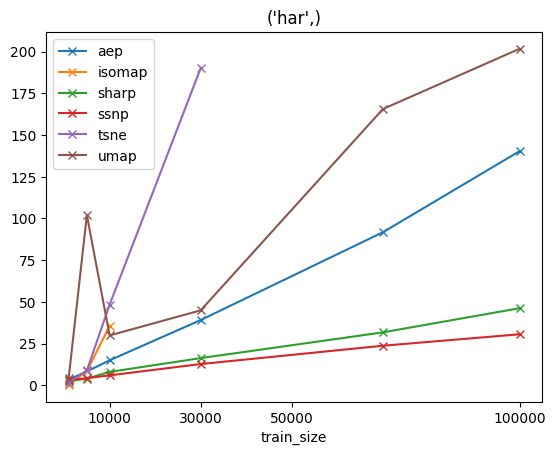

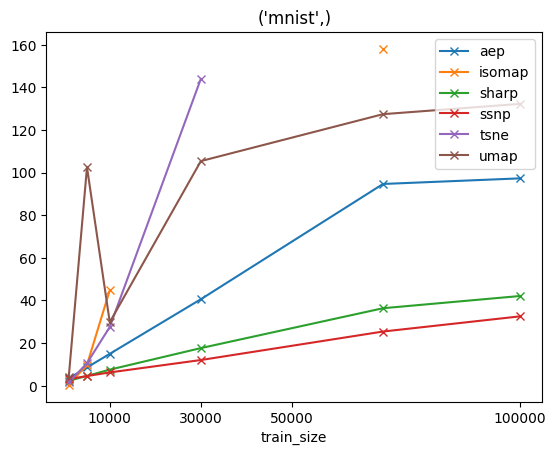

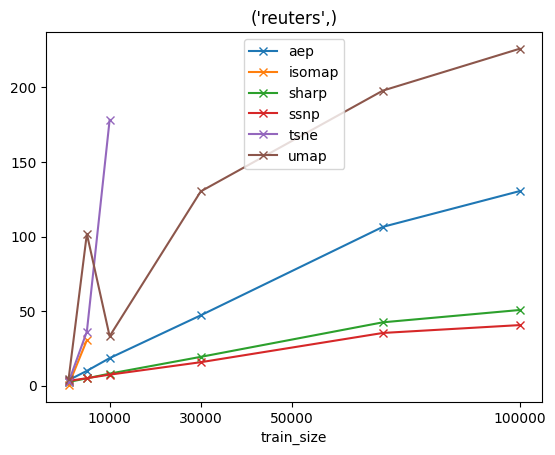

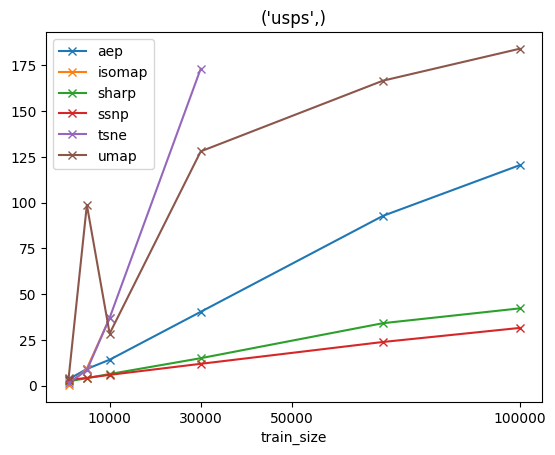

In [10]:
g = all_data.sort_values(by='train_size').groupby(['dataset'])

def plot_dataset(ix, df: pd.DataFrame):
    g_inner = df.sort_values('time', ascending=False).groupby('algorithm')
    fig, ax = plt.subplots(1, 1)
    plt.setp(ax, xticks=[10000, 30000, 50000, 100000], title=ix)
    for method, g_ in g_inner:
        g_.sort_values(by='train_size').plot('train_size', 'time', ax=ax, label=method, marker='x')  # type: ignore
    return ax
[plot_dataset(*g_i) for g_i in g]

In [11]:
all_data[all_data.algorithm == 'isomap'].sort_values(by=['dataset', 'train_size'])

dataset algorithm        time  train_size
10  fashionmnist    isomap    0.319166        1000
10  fashionmnist    isomap    9.244687        5000
10  fashionmnist    isomap   41.953510       10000
10  fashionmnist    isomap         NaN       30000
10  fashionmnist    isomap  161.284940       70000
10  fashionmnist    isomap         NaN      100000
4            har    isomap    0.298196        1000
4            har    isomap    8.488819        5000
4            har    isomap   35.562668       10000
4            har    isomap         NaN       30000
4            har    isomap         NaN       70000
4            har    isomap         NaN      100000
28         mnist    isomap    0.425904        1000
28         mnist    isomap    9.795934        5000
28         mnist    isomap   44.788359       10000
28         mnist    isomap         NaN       30000
28         mnist    isomap  158.088597       70000
28         mnist    isomap         NaN      100000
22       reuters    isomap    0.573051        1000
22       reuters    isomap   30.481753        5000
22       reuters    isomap         NaN       10000
22       reuters    isomap         NaN       30000
22       reuters    isomap         NaN       70000
22       reuters    isomap         NaN      100000
16          usps    isomap    0.418907        1000
16          usps    isomap    9.296438        5000
16          usps    isomap   36.748952       10000
16          usps    isomap         NaN       30000
16          usps    isomap         NaN       70000
16          usps    isomap         NaN      100000

In [12]:
all_data_reindexed = all_data.reindex()

In [13]:
all_data_reindexed = all_data.pivot(index=['dataset', 'algorithm', ], columns=['train_size'], values='time').reset_index()

In [14]:
all_data_reindexed.columns

Index(['dataset', 'algorithm', 1000, 5000, 10000, 30000, 70000, 100000], dtype='object', name='train_size')

In [15]:
all_data_reindexed[['10000_r', '30000_r', '50000_r', '70000_r', '100000_r']] = all_data_reindexed[[10000, 30000, 50000, 70000, 100000]].div(all_data_reindexed[10000], axis=0)

KeyError: '[50000] not in index'

In [16]:
all_data_reindexed

train_size       dataset algorithm      1000        5000       10000  \
0           fashionmnist       aep  3.403422    8.615514   14.695768   
1           fashionmnist    isomap  0.319166    9.244687   41.953510   
2           fashionmnist     sharp  2.372995    4.171106    6.288508   
3           fashionmnist      ssnp  3.131024    4.321119    6.098371   
4           fashionmnist      tsne  1.453999    8.459863   19.963046   
5           fashionmnist      umap  4.191062  100.032532   29.323574   
6                    har       aep  3.415608    8.277962   14.978143   
7                    har    isomap  0.298196    8.488819   35.562668   
8                    har     sharp  2.405427    3.982982    8.005868   
9                    har      ssnp  3.157771    4.214981    5.957341   
10                   har      tsne  1.603154    8.889164   48.332977   
11                   har      umap  4.145065  102.018403   29.874667   
12                 mnist       aep  3.431823    8.553448   14.951508   
13                 mnist    isomap  0.425904    9.795934   44.788359   
14                 mnist     sharp  2.316043    4.583923    7.528582   
15                 mnist      ssnp  3.082065    4.532732    6.220998   
16                 mnist      tsne  1.527613   10.558904   27.551126   
17                 mnist      umap  4.162204  102.514383   29.783702   
18               reuters       aep  3.698862    9.907829   18.446516   
19               reuters    isomap  0.573051   30.481753         NaN   
20               reuters     sharp  2.459562    4.909554    8.041303   
21               reuters      ssnp  3.205216    4.984310    7.364178   
22               reuters      tsne  2.465108   36.285487  178.208572   
23               reuters      umap  4.606510  101.781348   33.139126   
24                  usps       aep  3.449220    9.088131   14.116678   
25                  usps    isomap  0.418907    9.296438   36.748952   
26                  usps     sharp  2.325900    4.066020    6.293783   
27                  usps      ssnp  3.073321    4.175073    5.851327   
28                  usps      tsne  1.464041    8.392941   37.009019   
29                  usps      umap  4.143097   98.777152   28.419980   

train_size       30000       70000      100000  
0            38.921415   98.906438   93.976585  
1                  NaN  161.284940         NaN  
2            16.604623   34.309583   43.703221  
3            12.724393   24.190708   33.811405  
4            86.689876         NaN         NaN  
5            49.800934  125.082773  133.950812  
6            39.109852   91.729494  140.311758  
7                  NaN         NaN         NaN  
8            16.294097   31.719974   46.195829  
9            12.727863   23.711538   30.570090  
10          190.165263         NaN         NaN  
11           44.924204  165.579289  201.699427  
12           40.571366   94.652908   97.279032  
13                 NaN  158.088597         NaN  
14           17.640952   36.349518   42.069633  
15           12.042690   25.412121   32.517316  
16          144.007435         NaN         NaN  
17          105.386317  127.407350  132.223812  
18           47.147404  106.485665  130.428651  
19                 NaN         NaN         NaN  
20           19.297011   42.467800   50.714464  
21           15.714230   35.329549   40.592965  
22                 NaN         NaN         NaN  
23          130.240587  197.856613  225.888547  
24           40.317295   92.756286  120.452795  
25                 NaN         NaN         NaN  
26           14.954759   34.090647   42.180486  
27           11.887092   23.819913   31.491239  
28          173.245114         NaN         NaN  
29          128.035992  166.677236  184.121029

In [17]:
translate_alg = {
    'aep': 'AE',
    'isomap': "Isomap",
    "sharp": "ShaRP",
    "ssnp": "SSNP",
    "tsne": "t-SNE",
    "umap": "UMAP",
}

alg_to_linestyle = {
    'aep': 'dashed',
    'isomap': 'dotted',
    'sharp':'solid' ,
    'ssnp': 'dashdot',
    'tsne': (5, (10, 3)),
    'umap': (0, (5, 10)),
}

Text(0.5, 1.0, 'HAR')

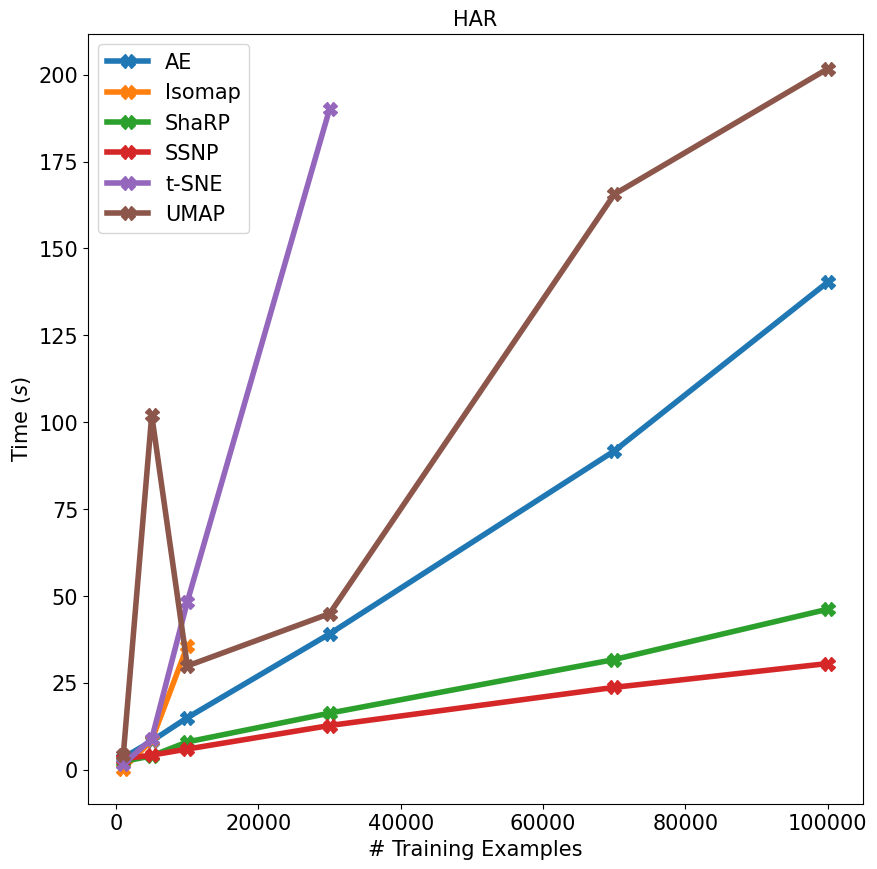

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grouped = all_data[all_data.dataset == 'har'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix[0]], lw=4, marker='X', markersize=10)  # type: ignore
ax.legend(prop={'size': 15})
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('HAR', fontsize=15)

/tmp/ipykernel_10501/3579355335.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ix, g in grouped:


Text(0.5, 1.0, 'Reuters')

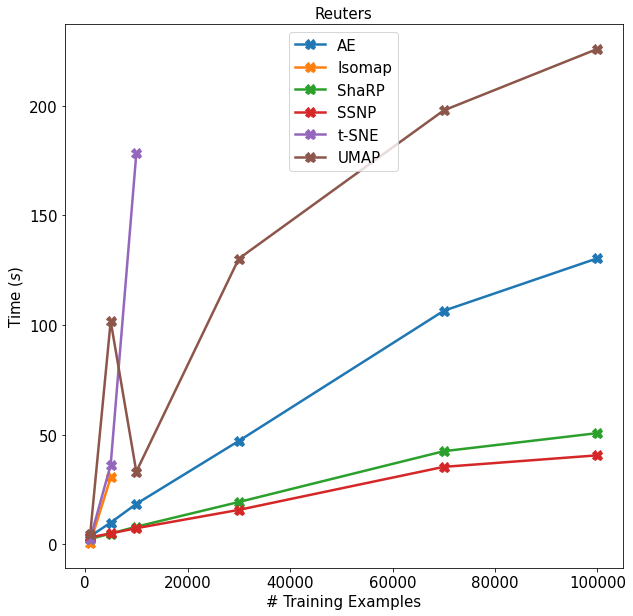

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
grouped = all_data[all_data.dataset == 'reuters'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='X', markersize=10)  # type: ignore
ax.legend(prop={'size': 15})
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('Reuters', fontsize=15)

[<matplotlib.lines.Line2D object at 0x7fb276c6d1f0>, <matplotlib.lines.Line2D object at 0x7fb276c8e040>, <matplotlib.lines.Line2D object at 0x7fb276a63e50>, <matplotlib.lines.Line2D object at 0x7fb276a58160>, <matplotlib.lines.Line2D object at 0x7fb276a40d90>, <matplotlib.lines.Line2D object at 0x7fb276a46190>] ['AE', 'Isomap', 'ShaRP', 'SSNP', 't-SNE', 'UMAP']
[<matplotlib.lines.Line2D object at 0x7fb2769bf7c0>, <matplotlib.lines.Line2D object at 0x7fb2769bcac0>, <matplotlib.lines.Line2D object at 0x7fb2769a2190>, <matplotlib.lines.Line2D object at 0x7fb2769ac580>, <matplotlib.lines.Line2D object at 0x7fb2769a0340>, <matplotlib.lines.Line2D object at 0x7fb27696c610>] ['AE', 'Isomap', 'ShaRP', 'SSNP', 't-SNE', 'UMAP']
[<matplotlib.lines.Line2D object at 0x7fb27694eb80>, <matplotlib.lines.Line2D object at 0x7fb276a01b80>, <matplotlib.lines.Line2D object at 0x7fb27695de80>, <matplotlib.lines.Line2D object at 0x7fb27696a310>, <matplotlib.lines.Line2D object at 0x7fb27699c730>, <matplotlib

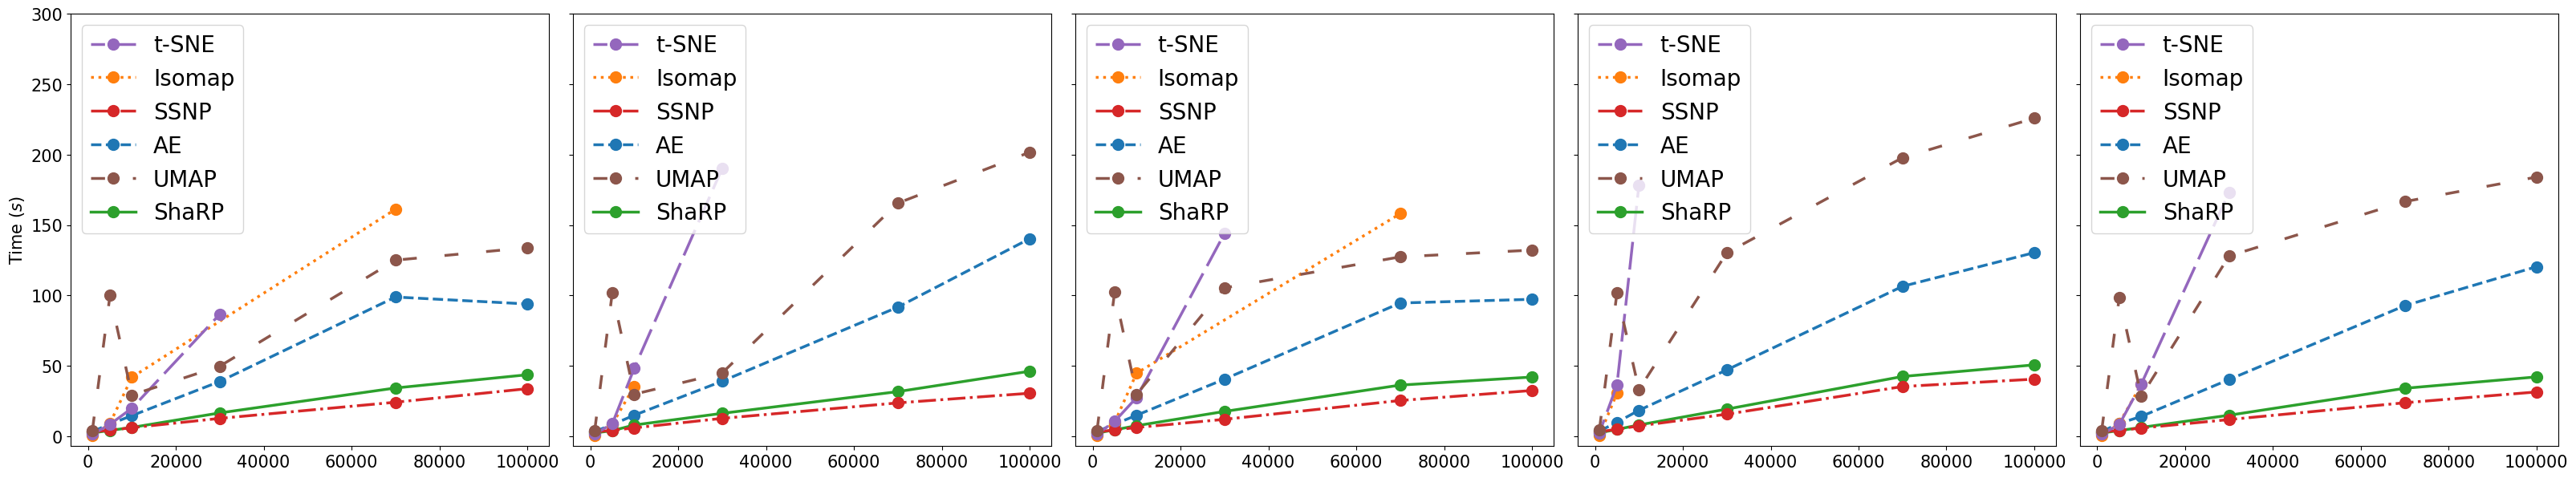

In [36]:
fig, axes = plt.subplots(
    1,
    5,
    figsize=(40, 7),
    sharey=True,
    gridspec_kw={'wspace': 0.05}
)

for dataset, ax in zip(["fashionmnist", "har", "mnist", "reuters", "usps"], axes):
    grouped = (
        all_data[all_data.dataset == dataset]
        .sort_values(by="train_size")
        .groupby(["algorithm"])
    )

    for (ix,), g in grouped:
        g.dropna().plot(
            "train_size",
            "time",
            ax=ax,
            label=translate_alg[ix],
            lw=2.5,
            marker="o",
            markersize=10,
            linestyle=alg_to_linestyle[ix],
        )
    ax.set_ylim(-7.0, 300.0)
    handles, labels = ax.get_legend_handles_labels()
    print(handles, labels)
    order = [4, 1, 3, 0, 5, 2]
    ax.legend(
        [handles[idx] for idx in order],
        [labels[idx] for idx in order],
        prop={"size": 20},
        loc="upper left",
    )
    ax.tick_params("both", labelsize=15)
    ax.set_xlabel("", fontsize=1)
    ax.set_ylabel("Time ($s$)", fontsize=15)

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (MNIST)')

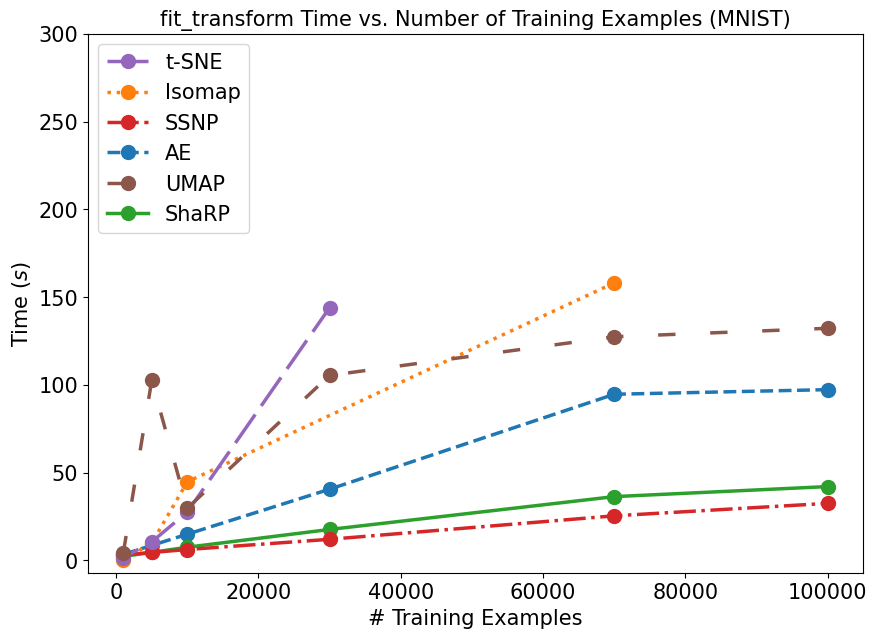

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = (
    all_data[all_data.dataset == "mnist"]
    .sort_values("train_size")
    .groupby(["algorithm"])
)
for ix, g in grouped:
    g.dropna().plot(
        "train_size",
        "time",
        ax=ax,
        label=translate_alg[ix[0]],
        lw=2.5,
        marker="o",
        markersize=10,
        linestyle=alg_to_linestyle[ix[0]],
    )
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)
handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    prop={"size": 15},
    loc="upper left",
)
ax.tick_params("both", labelsize=15)
ax.set_xlabel("# Training Examples", fontsize=15)
ax.set_ylabel("Time ($s$)", fontsize=15)
ax.set_title("fit_transform Time vs. Number of Training Examples (MNIST)", fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (HAR)')

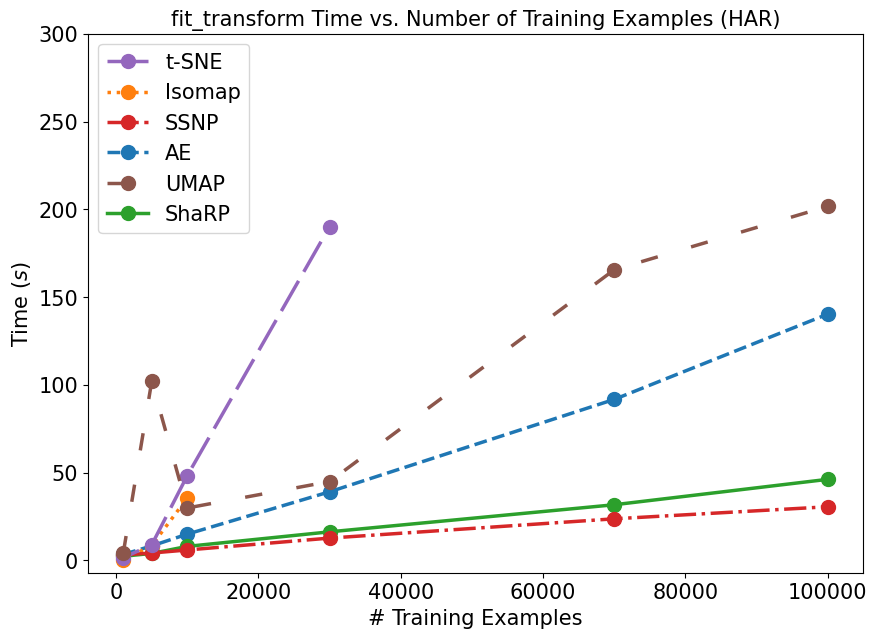

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'har'].sort_values('train_size').groupby(['algorithm'])
for (ix,), g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (HAR)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (FashionMNIST)')

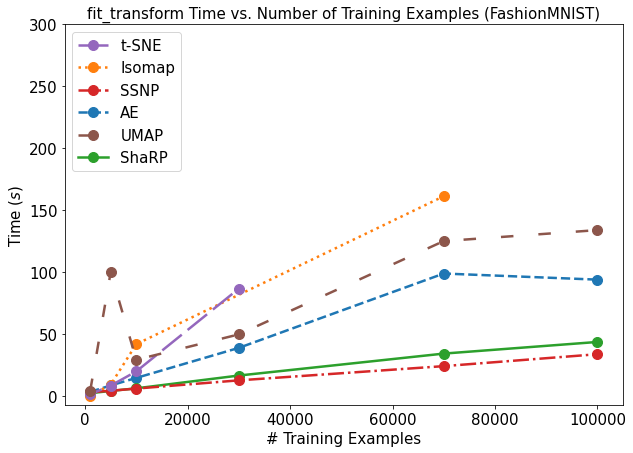

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'fashionmnist'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (FashionMNIST)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (USPS)')

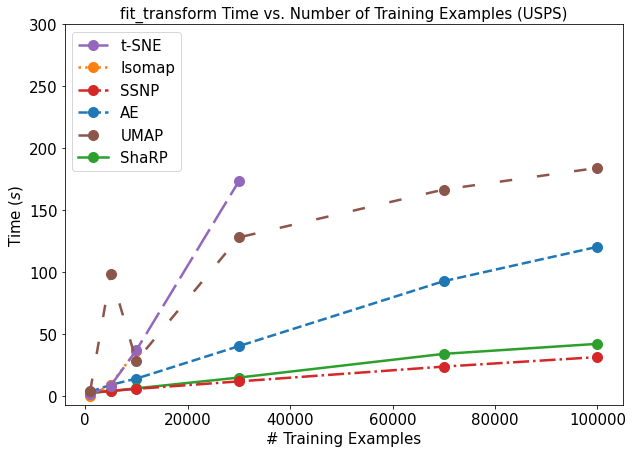

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'usps'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (USPS)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])

Text(0.5, 1.0, 'fit_transform Time vs. Number of Training Examples (Reuters)')

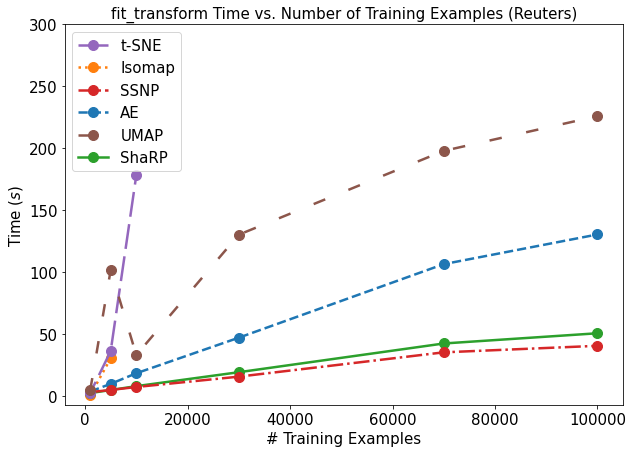

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
grouped = all_data[all_data.dataset == 'reuters'].sort_values('train_size').groupby(['algorithm'])
for ix, g in grouped:
    g.dropna().plot('train_size', 'time', ax=ax, label=translate_alg[ix], lw=2.5, marker='o', markersize=10, linestyle=alg_to_linestyle[ix])  # type: ignore
# ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(-7.0, 300.0)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 1, 3, 0, 5, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], prop={'size': 15}, loc='upper left')
ax.tick_params('both', labelsize=15)
ax.set_xlabel('# Training Examples', fontsize=15)
ax.set_ylabel('Time ($s$)', fontsize=15)
ax.set_title('fit_transform Time vs. Number of Training Examples (Reuters)', fontsize=15)
# ax.axis('equal')
# plt.setp(ax, xticks=[10_000, 30_000, 50_000, 70_000, 100_000])